# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd

## A. Compute performance metrics for the given data '5_a.csv'

In [2]:
df_a=pd.read_csv('5_a.csv')
df_a.head(5)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
df_a['y_predicted']= df_a['proba'].apply(lambda x: 1 if x >= 0.5 else 0)
df_a.head(5)

,y,proba,y_predicted
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [4]:
actual_y_train_array = df_a.iloc[:, 0].values
print('actual_y_train_array ', actual_y_train_array)
predicted_y_array = df_a.iloc[:, 2].values
print('predicted_y_array', predicted_y_array)
y_proba = df_a.iloc[:, 1].values

actual_y_train_array  [1. 1. 1. ... 1. 1. 1.]
predicted_y_array [1 1 1 ... 1 1 1]


In [5]:
def compute_confusion_matrix(actual_y, preditcted_y):
    unique_class = np.unique(actual_y)
    unique_class = unique_class[::-1]
    confusion_matrix = np.zeros((len(unique_class), len(unique_class)))
    for i in range(len(unique_class)):
        for j in range(len(unique_class)):
            confusion_matrix[i, j] = np.sum((actual_y == unique_class[i]) & (preditcted_y == unique_class[j]))

    return confusion_matrix

In [6]:
confusion_matrix_for_df_a = compute_confusion_matrix(actual_y_train_array, predicted_y_array)
print(confusion_matrix_for_df_a)


[[10000.     0.]
 [  100.     0.]]


In [7]:
def compute_f1_and_accuracy_score(confusion_matrix):
    true_positive = confusion_matrix[0][0]
    false_positive = confusion_matrix[0][1]
    true_negative  = confusion_matrix[1][1]    
    false_negative = confusion_matrix[1][0]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)
    
    f1_score = (2 * (precision * recall)) / (precision + recall )
        
    accuracy_score = (true_positive + true_negative)/np.concatenate(confusion_matrix).sum()
    
    return f1_score, accuracy_score

f1_score,accuracy_score = compute_f1_and_accuracy_score(confusion_matrix_for_df_a)

print("F1 score is: ", f1_score)
print("Accuracy score is: ", accuracy_score)


F1 score is:  0.9950248756218906
Accuracy score is:  0.9900990099009901


In [8]:
def compute_tpr_fpr(df):
    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()
    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)
    return [tpr, fpr]

compute_tpr_fpr(df_a)

[1.0, 1.0]

In [9]:
def compute_all_thresholds_tpr_fpr(df):
    tpr_for_all_thresholds = []
    fpr_for_all_thresholds = []
    sorted_df = df.sort_values(by=['proba'], ascending=False)
    unique_proba_thresholds = sorted_df['proba'].unique()
    for threshold in unique_proba_thresholds:
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_array = compute_tpr_fpr(sorted_df)
        tpr_for_all_thresholds.append(tpr_fpr_array[0])
        fpr_for_all_thresholds.append(tpr_fpr_array[1])
    return tpr_for_all_thresholds, fpr_for_all_thresholds

In [10]:
all_tpr_for_df_a, all_fpr_for_df_a = compute_all_thresholds_tpr_fpr(df_a)
auc_score_of_df_a = np.trapz(all_tpr_for_df_a, all_fpr_for_df_a)
print('AUC Score for 5_a is : ', auc_score_of_df_a)

AUC Score for 5_a is :  0.48829900000000004


Text(0.5, 1.0, 'AUC=0.4883')

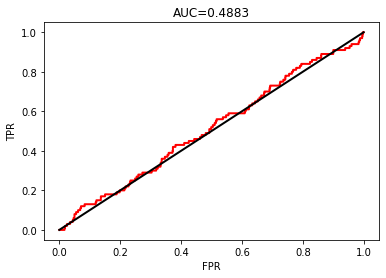

In [11]:
import matplotlib.pyplot as plt

plt.plot(all_tpr_for_df_a, all_fpr_for_df_a, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_of_df_a, 4)))

## B. Compute performance metrics for the given data '5_b.csv'

In [12]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [13]:
df_b['y_predicted']= df_b['proba'].apply(lambda x: 1 if x >= 0.5 else 0)
df_b.head(5)

,y,proba,y_predicted
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [14]:
actual_y_train_array_df_b = df_b.iloc[:, 0].values
print('actual_y_train_array ', actual_y_train_array_df_b)
predicted_y_array_df_b = df_b.iloc[:, 2].values
print('predicted_y_array', predicted_y_array_df_b)
y_proba_df_b = df_b.iloc[:, 1].values

actual_y_train_array  [0. 0. 0. ... 0. 0. 0.]
predicted_y_array [0 0 0 ... 0 0 0]


In [15]:
confusion_matrix_for_df_b = compute_confusion_matrix(actual_y_train_array_df_b, predicted_y_array_df_b)
print(confusion_matrix_for_df_b)

[[  55.   45.]
 [ 239. 9761.]]


In [16]:
f1_score_df_b,accuracy_score_df_b = compute_f1_and_accuracy_score(confusion_matrix_for_df_b)

print("F1 score is: ", f1_score_df_b)
print("Accuracy score is: ", accuracy_score_df_b)
compute_tpr_fpr(df_b)

F1 score is:  0.2791878172588833
Accuracy score is:  0.9718811881188119


[0.55, 0.0239]

In [17]:
all_tpr_for_df_b, all_fpr_for_df_b = compute_all_thresholds_tpr_fpr(df_b)
auc_score_of_df_b = np.trapz(all_tpr_for_df_b, all_fpr_for_df_b)
print('AUC Score for 5_b is : ', auc_score_of_df_b)

AUC Score for 5_b is :  0.9377570000000001


Text(0.5, 1.0, 'AUC=0.9378')

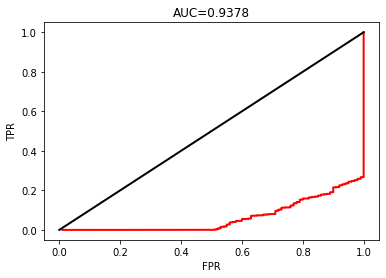

In [18]:
import matplotlib.pyplot as plt

plt.plot(all_tpr_for_df_b, all_fpr_for_df_b, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_of_df_b, 4)))

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 

In [19]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [20]:
actual_y_train_df_c = df_c.iloc[:, 0].values
print('actual_y_train_df_c ', actual_y_train_df_c)

y_proba_df_c = df_c.iloc[:, 1].values
print('y_proba_df_c ', y_proba_df_c)

unique_probability_thresholds_df_c = np.unique(df_c['prob'])

actual_y_train_df_c  [0 0 0 ... 1 1 1]
y_proba_df_c  [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [21]:
def compute_metric_A(y_actual, y_proba, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i in range(len(y_proba)):
        if y_proba[i] >= threshold :
            if y_actual[i] == 1:
                tp += 1
            else:
                fp += 1
                
        if y_proba[i] < threshold:
            if y_actual[i] == 0:
                tn += 1
            else:
                fn += 1

    A = (500 * fn) + (100 * fp)

    return A

In [22]:
def compute_minima_A (y_actual, y_proba, total_threshold ):
    min_a = float('inf')
    min_t = 0

    for threshold in total_threshold:
        a = compute_metric_A(y_actual, y_proba, threshold)
        if a <= min_a:
            min_a = min(a, min_a)
            min_t = threshold

    return min_a, min_t



In [23]:
print(compute_minima_A(actual_y_train_df_c, y_proba_df_c, unique_probability_thresholds_df_c ))

(141000, 0.2300390278970873)


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv

In [24]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [25]:
actual_y_train_df_d = df_d.iloc[:, 0].values
print('actual_y_train_df_d ', actual_y_train_df_d)

predicted_y_df_d = df_d.iloc[:, 1].values
print('predicted_y_df_d ', predicted_y_df_d)

actual_y_train_df_d  [101. 120. 131. ... 106. 105.  81.]
predicted_y_df_d  [100. 100. 113. ...  93. 101. 104.]


In [26]:
def Compute_Mean_Square_Error(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted)**2)
    return mse

print(Compute_Mean_Square_Error(actual_y_train_df_d, predicted_y_df_d))

177.16569974554707


In [27]:
def Compute_MAPE(y_actual, y_predicted):
    mape = np.mean((np.abs(y_actual - y_predicted)) / np.mean(y_actual)) * 100
    return mape

print(Compute_MAPE(actual_y_train_df_d, predicted_y_df_d))

12.912029940096867


In [28]:
def Compute_R2_error(y_actual, y_predicted):

    sum_squared_residual = ((y_actual - y_predicted)**2).sum()
    sum_squared_total = ((y_actual - y_actual.mean())**2).sum()

    return (1 - (sum_squared_residual/sum_squared_total))

print(Compute_R2_error(actual_y_train_df_d, predicted_y_df_d))

0.9563582786990937
